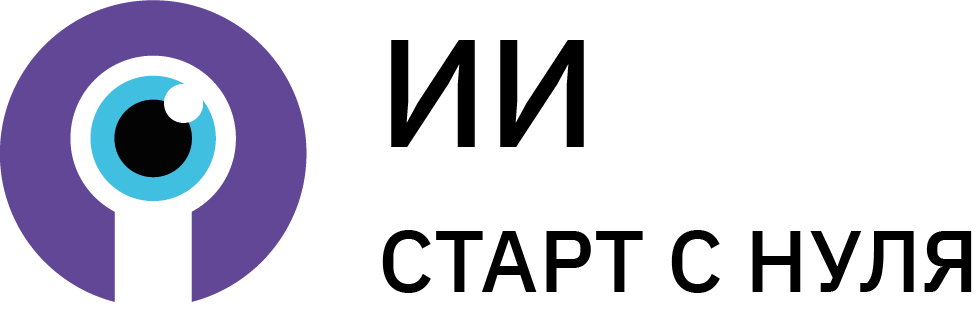

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

In [2]:
bikes = pd.read_csv(r'day.csv')

In [3]:
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [4]:
bikes.iloc[1]

instant                2
dteday        2011-01-02
season                 1
yr                     0
mnth                   1
holiday                0
weekday                0
workingday             0
weathersit             2
temp            0.363478
atemp           0.353739
hum             0.696087
windspeed       0.248539
casual               131
registered           670
cnt                  801
Name: 1, dtype: object

In [5]:
bikes.cnt.sum() / bikes.cnt.count()

4504.3488372093025

In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
spring = bikes[bikes.season == 1]
spring.mean()

instant        262.685083
season           1.000000
yr               0.502762
mnth             3.093923
holiday          0.038674
weekday          3.000000
workingday       0.662983
weathersit       1.408840
temp             0.297748
atemp            0.296914
hum              0.582903
windspeed        0.214537
casual         334.928177
registered    2269.204420
cnt           2604.132597
dtype: float64

In [8]:
import math

In [9]:
def err(predictor):
    return math.sqrt(np.mean((bikes.cnt - bikes.apply(predictor, axis=1))**2))

In [10]:
def predict_avg(row):
    return 4500

In [11]:
def predict_avg_season(row):
    if row.season == 1:
        return 2600
    if row.season == 2:
        return 4900
    if row.season == 3:
        return 5600
    return 4700

In [12]:
bikes.apply(predict_avg, axis=1)

0      4500
1      4500
2      4500
3      4500
4      4500
       ... 
726    4500
727    4500
728    4500
729    4500
730    4500
Length: 731, dtype: int64

In [19]:
def predict_temp(row):
    return row.atemp * 8000

In [20]:
err(predict_temp)

1662.8799053283883

In [14]:
bikes.cnt > 3000

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727     True
728    False
729    False
730    False
Name: cnt, Length: 731, dtype: bool

In [15]:
bikes.groupby('season').mean()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1,262.685083,0.502762,3.093923,0.038674,3.000000,0.662983,1.408840,0.297748,0.296914,0.582903,0.214537,334.928177,2269.204420,2604.132597
2,308.500000,0.500000,4.652174,0.021739,2.989130,0.695652,1.402174,0.544405,0.520307,0.626948,0.203507,1106.097826,3886.233696,4992.331522
3,401.500000,0.500000,7.691489,0.021277,3.031915,0.696809,1.297872,0.706309,0.655898,0.633482,0.172095,1202.611702,4441.691489,5644.303191
4,493.000000,0.500000,10.696629,0.033708,2.966292,0.679775,1.477528,0.422906,0.415539,0.668719,0.171995,729.112360,3999.050562,4728.162921


In [16]:
import matplotlib.pyplot as plt

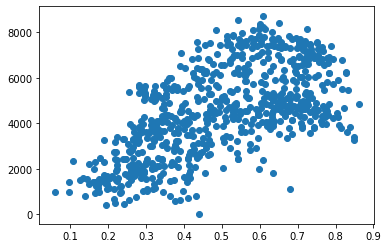

In [17]:
plt.scatter(bikes.temp, bikes.cnt)
plt.show()